# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Confirm sufficient city count
len(cities)>500

True

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [21]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

cloudiness = []
country = []
dates = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
newCities = []
        
print('Beginning Data Retrieval')
print('-----------------------------')

recordCount = 0
setCount = 1

for city in cities:
      
    response = requests.get(query_url + city).json()
    

    
    try:
        if recordCount < 50:
            recordCount = recordCount + 1
        else:
            recordCount = 1
            setCount = setCount + 1
            
            
        print(f'Processing Record {recordCount} of Set {setCount} | {city}')
        
        
        cloudiness.append(response['clouds']['all']) #percentage
        country.append(response['sys']['country'])
        
        dt = response['dt'] #unix timestamp
        converted_dt = datetime.utcfromtimestamp(dt).strftime('%m/%d/%y') #Convert date to 'm/d/y' format
        dates.append(converted_dt)
                
        humidity.append(response['main']['humidity']) #percentage
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed']) #mph
        newCities.append(city)
        
    except (KeyError):
        print(f'City not found. Skipping {city}...')


print('-----------------------------')
print('Data Retrieval Complete')  
print('-----------------------------')    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | west odessa
Processing Record 3 of Set 1 | ankazobe
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping illoqqortoormiut...
Processing Record 11 of Set 1 | leningradskiy
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | havre-saint-pierre
Processing Record 17 of Set 1 | fare
Processing Record 18 of Set 1 | severnyy
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | matara
Processing Record 21 of Set 1 | hobart
Processing Record 2

Processing Record 36 of Set 4 | sao miguel do araguaia
Processing Record 37 of Set 4 | juifang
City not found. Skipping juifang...
Processing Record 38 of Set 4 | yeppoon
Processing Record 39 of Set 4 | irbil
Processing Record 40 of Set 4 | srednekolymsk
Processing Record 41 of Set 4 | tuatapere
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | sal rei
Processing Record 44 of Set 4 | bonavista
Processing Record 45 of Set 4 | aguimes
Processing Record 46 of Set 4 | katangli
Processing Record 47 of Set 4 | kyra
Processing Record 48 of Set 4 | huarmey
Processing Record 49 of Set 4 | kalmunai
Processing Record 50 of Set 4 | yarega
Processing Record 1 of Set 5 | northam
Processing Record 2 of Set 5 | lolua
City not found. Skipping lolua...
Processing Record 3 of Set 5 | umea
Processing Record 4 of Set 5 | nome
Processing Record 5 of Set 5 | kemin
Processing Record 6 of Set 5 | valdivia
Processing Record 7 of Set 5 | jalu
Processing Record 8 of Set 5 | lata
Processing Re

Processing Record 27 of Set 8 | aflu
City not found. Skipping aflu...
Processing Record 28 of Set 8 | shitanjing
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | meyungs
City not found. Skipping meyungs...
Processing Record 31 of Set 8 | te anau
Processing Record 32 of Set 8 | quelimane
Processing Record 33 of Set 8 | los llanos de aridane
Processing Record 34 of Set 8 | fairbanks
Processing Record 35 of Set 8 | tiznit
Processing Record 36 of Set 8 | luocheng
Processing Record 37 of Set 8 | sovetskiy
Processing Record 38 of Set 8 | cagayan de tawi-tawi
City not found. Skipping cagayan de tawi-tawi...
Processing Record 39 of Set 8 | burnie
Processing Record 40 of Set 8 | vilhena
Processing Record 41 of Set 8 | iguape
Processing Record 42 of Set 8 | achalpur
Processing Record 43 of Set 8 | dalbandin
Processing Record 44 of Set 8 | hobe sound
Processing Record 45 of Set 8 | plouzane
Processing Record 46 of Set 8 | porto novo
Processing Record 47 of Set 8 | galgama

Processing Record 15 of Set 12 | tahe
Processing Record 16 of Set 12 | oranjestad
Processing Record 17 of Set 12 | sungaipenuh
Processing Record 18 of Set 12 | chipinge
Processing Record 19 of Set 12 | da lat
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | hamilton
Processing Record 22 of Set 12 | dekar
Processing Record 23 of Set 12 | temaraia
City not found. Skipping temaraia...
Processing Record 24 of Set 12 | sajanan
Processing Record 25 of Set 12 | novopokrovka
Processing Record 26 of Set 12 | cary
Processing Record 27 of Set 12 | bubaque
Processing Record 28 of Set 12 | finnsnes
Processing Record 29 of Set 12 | porto walter
Processing Record 30 of Set 12 | kantunilkin
Processing Record 31 of Set 12 | lebedyan
Processing Record 32 of Set 12 | antalaha
Processing Record 33 of Set 12 | jinchang
Processing Record 34 of Set 12 | kachug
Processing Record 35 of Set 12 | one hundred mile house
City not found. Skipping one hundred mile house...
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
cityData = pd.DataFrame({'City' : (newCities),
                       'Cloudiness' : (cloudiness),
                       'Country' : (country),
                       'Date' : dates,
                       'Humidity' : (humidity),
                       'Latitude' : (lat),
                       'Longitude' : (lng),
                       'Max Temp' : (max_temp),
                       'Wind Speed' : (wind_speed)
})
cityData.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Latitude      559
Longitude     559
Max Temp      559
Wind Speed    559
dtype: int64

In [23]:
cityData.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,albany,75,US,01/28/20,86,42.60,-73.97,36.00,6.93
1,west odessa,90,US,01/28/20,65,31.84,-102.50,50.00,24.16
2,ankazobe,75,MG,01/28/20,54,-18.32,47.12,84.20,12.75
3,new norfolk,40,AU,01/28/20,63,-42.78,147.06,64.40,9.17
4,jamestown,90,US,01/28/20,86,42.10,-79.24,33.01,10.29


In [24]:
cityData.to_csv(output_data_file, index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [25]:
cloudiness = cityData['Cloudiness']
mdy = cityData.iloc[0,3] #1st date listed
humidity = cityData['Humidity']
latitude = cityData['Latitude']
max_temp = cityData['Max Temp']
wind_speed = cityData['Wind Speed']

#### Latitude vs. Temperature Plot

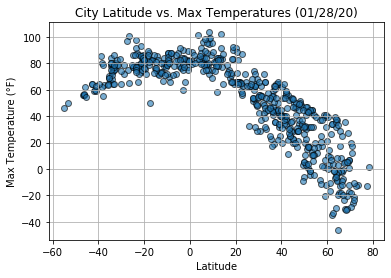

In [55]:
plt.scatter(latitude, max_temp, edgecolor = 'black', alpha = 0.6)
plt.title(f'City Latitude vs. Max Temperatures ({mdy})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid()

plt.savefig('../output_data/lat_vs_temp.png')

plt.show()

#### Latitude vs. Humidity Plot

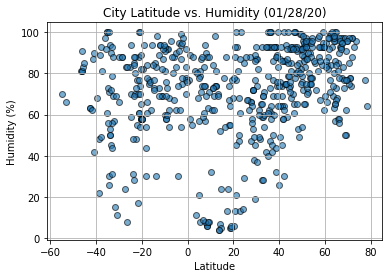

In [56]:
plt.scatter(latitude, humidity, edgecolor = 'black', alpha = 0.6)
plt.title(f'City Latitude vs. Humidity ({mdy})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig('../output_data/lat_vs_humid.png')

plt.show()

#### Latitude vs. Cloudiness Plot

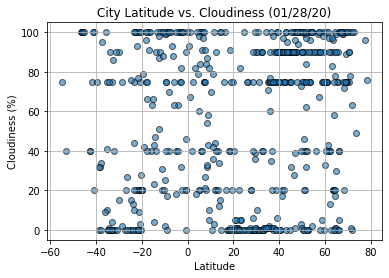

In [57]:
plt.scatter(latitude, cloudiness, edgecolor = 'black', alpha = 0.6)
plt.title(f'City Latitude vs. Cloudiness ({mdy})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.savefig('../output_data/lat_vs_cloud.png')

plt.show()

#### Latitude vs. Wind Speed Plot

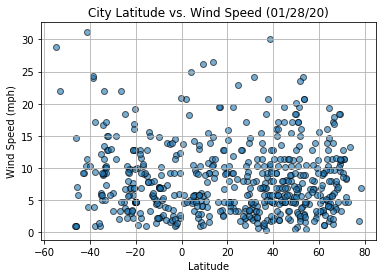

In [58]:
plt.scatter(latitude, wind_speed, edgecolor = 'black', alpha = 0.6)
plt.title(f'City Latitude vs. Wind Speed ({mdy})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig('../output_data/lat_vs_wind.png')

plt.show()

## Linear Regression

In [30]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotLinReg(x_values, y_values):
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    reg_values = x_values * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    plt.plot(x_values, reg_values, color ='r')
    plt.annotate(line_eq, xy=(0.35, 0.225), xycoords = 'figure fraction', fontsize = 15, color = 'r')
    
    print(f'The R² is: {rvalue}')

In [31]:
# Create Northern Hemisphere DataFrames
cityData_N = cityData[cityData['Latitude'] > 0]

cloudiness_N = cityData_N['Cloudiness']
humidity_N = cityData_N['Humidity']
latitude_N = cityData_N['Latitude']
max_temp_N = cityData_N['Max Temp']
wind_speed_N = cityData_N['Wind Speed']

# Create Southern Hemisphere DataFrames
cityData_S = cityData[cityData['Latitude'] < 0]

cloudiness_S = cityData_S['Cloudiness']
humidity_S = cityData_S['Humidity']
latitude_S = cityData_S['Latitude']
max_temp_S = cityData_S['Max Temp']
wind_speed_S = cityData_S['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R² is: -0.8823072020362083


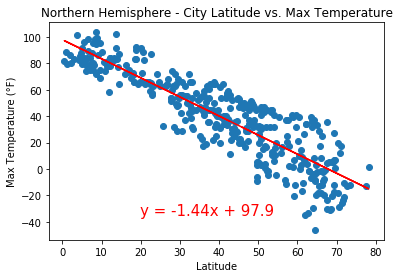

In [40]:
plt.scatter(latitude_N, max_temp_N)
plt.title(f'Northern Hemisphere - City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

plotLinReg(latitude_N, max_temp_N)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R² is: 0.5043861398847962


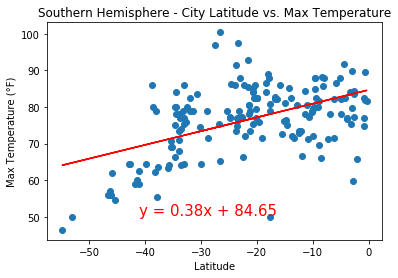

In [41]:
plt.scatter(latitude_S, max_temp_S)
plt.title(f'Southern Hemisphere - City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

plotLinReg(latitude_S, max_temp_S)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R² is: 0.4507236023615342


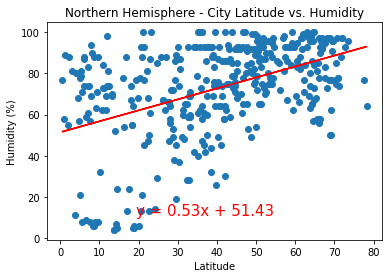

In [42]:
plt.scatter(latitude_N, humidity_N)
plt.title(f'Northern Hemisphere - City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plotLinReg(latitude_N, humidity_N)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R² is: 0.1740851722042958


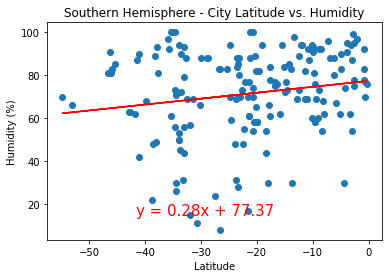

In [43]:
plt.scatter(latitude_S, humidity_S)
plt.title(f'Southern Hemisphere - City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plotLinReg(latitude_S, humidity_S)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R² is: 0.23902121609280258


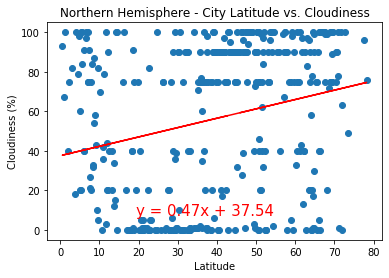

In [44]:
plt.scatter(latitude_N, cloudiness_N)
plt.title(f'Northern Hemisphere - City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plotLinReg(latitude_N, cloudiness_N)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R² is: 0.1981089495829952


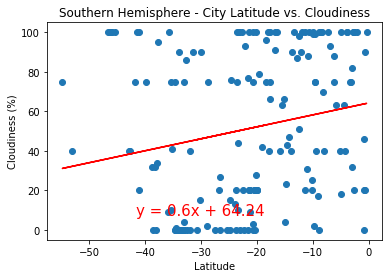

In [45]:
plt.scatter(latitude_S, cloudiness_S)
plt.title(f'Southern Hemisphere - City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plotLinReg(latitude_S, cloudiness_S)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R² is: 0.0028448588547528536


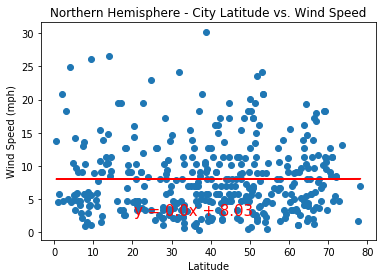

In [46]:
plt.scatter(latitude_N, wind_speed_N)
plt.title(f'Northern Hemisphere - City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plotLinReg(latitude_N, wind_speed_N)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R² is: -0.2814688926507897


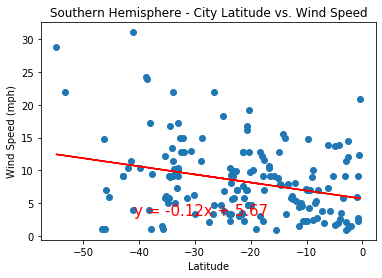

In [47]:
plt.scatter(latitude_S, wind_speed_S)
plt.title(f'Southern Hemisphere - City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plotLinReg(latitude_S, wind_speed_S)

plt.show()